<a href="https://colab.research.google.com/github/KrishnaPandya-VGEC-IT/Machine-Learning/blob/main/Final_Year_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import re    # for regular expressions 
import nltk  # for text manipulation 
import string # for text manipulation 
import warnings 
import numpy as np 
import pandas as pd # for data manipulation 
import matplotlib.pyplot as plt
import io
import pandas as pd

pd.set_option("display.max_colwidth", 200) 
warnings.filterwarnings("ignore") #ignore warnings

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

%matplotlib inline

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/training.1600000.processed.noemoticon.csv",encoding='latin-1')
data.head()

,"4""",2016620477,Wed Jun 03 07:05:13 PDT 2009,NO_QUERY,ashleemotes,"@bbgurljewelz we don't have that much money, but man I would love to"
0,4,2016620592,Wed Jun 03 07:05:13 PDT 2009,NO_QUERY,theolegrandma,"@Rimythiagirl94 I want to see the slide show, too! Luv u! ;)"
1,4,2016620616,Wed Jun 03 07:05:13 PDT 2009,NO_QUERY,Musicluver1123,Shower then mall wit chiclett and sean 2 get last min prom stuff
2,4,2016620680,Wed Jun 03 07:05:14 PDT 2009,NO_QUERY,LindaEskin,@Scath Thank you.
3,4,2016620715,Wed Jun 03 07:05:14 PDT 2009,NO_QUERY,JNicoleF,@JennaSchubart Are you and Demi Going?
4,4,2016620746,Wed Jun 03 07:05:14 PDT 2009,NO_QUERY,imjustagoyle,"@alisondoyle I know! I love seeing the creativity! Who knows - employers might be looking at them, too!"


In [ ]:
DATASET_COLUMNS = ["target", "ids", "date", "flag", "user", "TweetText"]
data.columns = DATASET_COLUMNS
data.head()

,target,ids,date,flag,user,TweetText
0,4,2016620592,Wed Jun 03 07:05:13 PDT 2009,NO_QUERY,theolegrandma,"@Rimythiagirl94 I want to see the slide show, too! Luv u! ;)"
1,4,2016620616,Wed Jun 03 07:05:13 PDT 2009,NO_QUERY,Musicluver1123,Shower then mall wit chiclett and sean 2 get last min prom stuff
2,4,2016620680,Wed Jun 03 07:05:14 PDT 2009,NO_QUERY,LindaEskin,@Scath Thank you.
3,4,2016620715,Wed Jun 03 07:05:14 PDT 2009,NO_QUERY,JNicoleF,@JennaSchubart Are you and Demi Going?
4,4,2016620746,Wed Jun 03 07:05:14 PDT 2009,NO_QUERY,imjustagoyle,"@alisondoyle I know! I love seeing the creativity! Who knows - employers might be looking at them, too!"


In [ ]:
positif_data = data[data.target==4].iloc[:25000,:]
print(positif_data.shape)
negative_data = data[data.target==0].iloc[:1000,:]
print(negative_data.shape)

(25000, 6)
(0, 6)


In [ ]:
data = pd.concat([positif_data,negative_data],axis = 0)
print(data.shape)
data.head()

(25000, 6)


,target,ids,date,flag,user,TweetText
0,4,2016620592,Wed Jun 03 07:05:13 PDT 2009,NO_QUERY,theolegrandma,"@Rimythiagirl94 I want to see the slide show, too! Luv u! ;)"
1,4,2016620616,Wed Jun 03 07:05:13 PDT 2009,NO_QUERY,Musicluver1123,Shower then mall wit chiclett and sean 2 get last min prom stuff
2,4,2016620680,Wed Jun 03 07:05:14 PDT 2009,NO_QUERY,LindaEskin,@Scath Thank you.
3,4,2016620715,Wed Jun 03 07:05:14 PDT 2009,NO_QUERY,JNicoleF,@JennaSchubart Are you and Demi Going?
4,4,2016620746,Wed Jun 03 07:05:14 PDT 2009,NO_QUERY,imjustagoyle,"@alisondoyle I know! I love seeing the creativity! Who knows - employers might be looking at them, too!"


**Data Cleaning**

In [ ]:
data['Clean_TweetText'] = data['TweetText'].str.replace("@", "") 
data.head()

,target,ids,date,flag,user,TweetText,Clean_TweetText
0,4,2016620592,Wed Jun 03 07:05:13 PDT 2009,NO_QUERY,theolegrandma,"@Rimythiagirl94 I want to see the slide show, too! Luv u! ;)","Rimythiagirl94 I want to see the slide show, too! Luv u! ;)"
1,4,2016620616,Wed Jun 03 07:05:13 PDT 2009,NO_QUERY,Musicluver1123,Shower then mall wit chiclett and sean 2 get last min prom stuff,Shower then mall wit chiclett and sean 2 get last min prom stuff
2,4,2016620680,Wed Jun 03 07:05:14 PDT 2009,NO_QUERY,LindaEskin,@Scath Thank you.,Scath Thank you.
3,4,2016620715,Wed Jun 03 07:05:14 PDT 2009,NO_QUERY,JNicoleF,@JennaSchubart Are you and Demi Going?,JennaSchubart Are you and Demi Going?
4,4,2016620746,Wed Jun 03 07:05:14 PDT 2009,NO_QUERY,imjustagoyle,"@alisondoyle I know! I love seeing the creativity! Who knows - employers might be looking at them, too!","alisondoyle I know! I love seeing the creativity! Who knows - employers might be looking at them, too!"


Removing links

In [ ]:
data['Clean_TweetText'] = data['Clean_TweetText'].str.replace(r"http\S+", "") 
data.head()

,target,ids,date,flag,user,TweetText,Clean_TweetText
0,4,2016620592,Wed Jun 03 07:05:13 PDT 2009,NO_QUERY,theolegrandma,"@Rimythiagirl94 I want to see the slide show, too! Luv u! ;)","Rimythiagirl94 I want to see the slide show, too! Luv u! ;)"
1,4,2016620616,Wed Jun 03 07:05:13 PDT 2009,NO_QUERY,Musicluver1123,Shower then mall wit chiclett and sean 2 get last min prom stuff,Shower then mall wit chiclett and sean 2 get last min prom stuff
2,4,2016620680,Wed Jun 03 07:05:14 PDT 2009,NO_QUERY,LindaEskin,@Scath Thank you.,Scath Thank you.
3,4,2016620715,Wed Jun 03 07:05:14 PDT 2009,NO_QUERY,JNicoleF,@JennaSchubart Are you and Demi Going?,JennaSchubart Are you and Demi Going?
4,4,2016620746,Wed Jun 03 07:05:14 PDT 2009,NO_QUERY,imjustagoyle,"@alisondoyle I know! I love seeing the creativity! Who knows - employers might be looking at them, too!","alisondoyle I know! I love seeing the creativity! Who knows - employers might be looking at them, too!"


Removing Punctuations, Numbers, and Special Characters

In [ ]:
data['Clean_TweetText'] = data['Clean_TweetText'].str.replace("[^a-zA-Z]", " ") 
data.head()

,target,ids,date,flag,user,TweetText,Clean_TweetText
0,4,2016620592,Wed Jun 03 07:05:13 PDT 2009,NO_QUERY,theolegrandma,"@Rimythiagirl94 I want to see the slide show, too! Luv u! ;)",Rimythiagirl I want to see the slide show too Luv u
1,4,2016620616,Wed Jun 03 07:05:13 PDT 2009,NO_QUERY,Musicluver1123,Shower then mall wit chiclett and sean 2 get last min prom stuff,Shower then mall wit chiclett and sean get last min prom stuff
2,4,2016620680,Wed Jun 03 07:05:14 PDT 2009,NO_QUERY,LindaEskin,@Scath Thank you.,Scath Thank you
3,4,2016620715,Wed Jun 03 07:05:14 PDT 2009,NO_QUERY,JNicoleF,@JennaSchubart Are you and Demi Going?,JennaSchubart Are you and Demi Going
4,4,2016620746,Wed Jun 03 07:05:14 PDT 2009,NO_QUERY,imjustagoyle,"@alisondoyle I know! I love seeing the creativity! Who knows - employers might be looking at them, too!",alisondoyle I know I love seeing the creativity Who knows employers might be looking at them too


In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

Remove stop words

In [ ]:
stopwords=nltk.corpus.stopwords.words('english')

In [ ]:
def remove_stopwords(text):
    clean_text=' '.join([word for word in text.split() if word not in stopwords])
    return clean_text

Text Tokenization and Normalization

In [ ]:
data['Clean_TweetText'] = data['Clean_TweetText'].apply(lambda x: x.split())
data.head()

,target,ids,date,flag,user,TweetText,Clean_TweetText
0,4,2016620592,Wed Jun 03 07:05:13 PDT 2009,NO_QUERY,theolegrandma,"@Rimythiagirl94 I want to see the slide show, too! Luv u! ;)","[Rimythiagirl, I, want, to, see, the, slide, show, too, Luv, u]"
1,4,2016620616,Wed Jun 03 07:05:13 PDT 2009,NO_QUERY,Musicluver1123,Shower then mall wit chiclett and sean 2 get last min prom stuff,"[Shower, then, mall, wit, chiclett, and, sean, get, last, min, prom, stuff]"
2,4,2016620680,Wed Jun 03 07:05:14 PDT 2009,NO_QUERY,LindaEskin,@Scath Thank you.,"[Scath, Thank, you]"
3,4,2016620715,Wed Jun 03 07:05:14 PDT 2009,NO_QUERY,JNicoleF,@JennaSchubart Are you and Demi Going?,"[JennaSchubart, Are, you, and, Demi, Going]"
4,4,2016620746,Wed Jun 03 07:05:14 PDT 2009,NO_QUERY,imjustagoyle,"@alisondoyle I know! I love seeing the creativity! Who knows - employers might be looking at them, too!","[alisondoyle, I, know, I, love, seeing, the, creativity, Who, knows, employers, might, be, looking, at, them, too]"


In [ ]:
from nltk.stem.porter import * 
stemmer = PorterStemmer() 
data['Clean_TweetText'] = data['Clean_TweetText'].apply(lambda x: [stemmer.stem(i) for i in x])
data.head()

,target,ids,date,flag,user,TweetText,Clean_TweetText
0,4,2016620592,Wed Jun 03 07:05:13 PDT 2009,NO_QUERY,theolegrandma,"@Rimythiagirl94 I want to see the slide show, too! Luv u! ;)","[rimythiagirl, I, want, to, see, the, slide, show, too, luv, u]"
1,4,2016620616,Wed Jun 03 07:05:13 PDT 2009,NO_QUERY,Musicluver1123,Shower then mall wit chiclett and sean 2 get last min prom stuff,"[shower, then, mall, wit, chiclett, and, sean, get, last, min, prom, stuff]"
2,4,2016620680,Wed Jun 03 07:05:14 PDT 2009,NO_QUERY,LindaEskin,@Scath Thank you.,"[scath, thank, you]"
3,4,2016620715,Wed Jun 03 07:05:14 PDT 2009,NO_QUERY,JNicoleF,@JennaSchubart Are you and Demi Going?,"[jennaschubart, are, you, and, demi, go]"
4,4,2016620746,Wed Jun 03 07:05:14 PDT 2009,NO_QUERY,imjustagoyle,"@alisondoyle I know! I love seeing the creativity! Who knows - employers might be looking at them, too!","[alisondoyl, I, know, I, love, see, the, creativ, who, know, employ, might, be, look, at, them, too]"


Now let’s stitch these tokens back together

In [ ]:
data['Clean_TweetText'] = data['Clean_TweetText'].apply(lambda x: ' '.join([w for w in x]))
data.head()

,target,ids,date,flag,user,TweetText,Clean_TweetText
0,4,2016620592,Wed Jun 03 07:05:13 PDT 2009,NO_QUERY,theolegrandma,"@Rimythiagirl94 I want to see the slide show, too! Luv u! ;)",rimythiagirl I want to see the slide show too luv u
1,4,2016620616,Wed Jun 03 07:05:13 PDT 2009,NO_QUERY,Musicluver1123,Shower then mall wit chiclett and sean 2 get last min prom stuff,shower then mall wit chiclett and sean get last min prom stuff
2,4,2016620680,Wed Jun 03 07:05:14 PDT 2009,NO_QUERY,LindaEskin,@Scath Thank you.,scath thank you
3,4,2016620715,Wed Jun 03 07:05:14 PDT 2009,NO_QUERY,JNicoleF,@JennaSchubart Are you and Demi Going?,jennaschubart are you and demi go
4,4,2016620746,Wed Jun 03 07:05:14 PDT 2009,NO_QUERY,imjustagoyle,"@alisondoyle I know! I love seeing the creativity! Who knows - employers might be looking at them, too!",alisondoyl I know I love see the creativ who know employ might be look at them too


Removing small words

In [ ]:
data['Clean_TweetText'] = data['Clean_TweetText'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
data.head()

,target,ids,date,flag,user,TweetText,Clean_TweetText
0,4,2016620592,Wed Jun 03 07:05:13 PDT 2009,NO_QUERY,theolegrandma,"@Rimythiagirl94 I want to see the slide show, too! Luv u! ;)",rimythiagirl want slide show
1,4,2016620616,Wed Jun 03 07:05:13 PDT 2009,NO_QUERY,Musicluver1123,Shower then mall wit chiclett and sean 2 get last min prom stuff,shower then mall chiclett sean last prom stuff
2,4,2016620680,Wed Jun 03 07:05:14 PDT 2009,NO_QUERY,LindaEskin,@Scath Thank you.,scath thank
3,4,2016620715,Wed Jun 03 07:05:14 PDT 2009,NO_QUERY,JNicoleF,@JennaSchubart Are you and Demi Going?,jennaschubart demi
4,4,2016620746,Wed Jun 03 07:05:14 PDT 2009,NO_QUERY,imjustagoyle,"@alisondoyle I know! I love seeing the creativity! Who knows - employers might be looking at them, too!",alisondoyl know love creativ know employ might look them


Data Vizualisation

In this section we will visualize the tweets using wordclouds. A wordcloud is a visualization wherein the most frequent words appear in large size and the less frequent words appear in smaller sizes.

What are the most common words in the entire dataset?

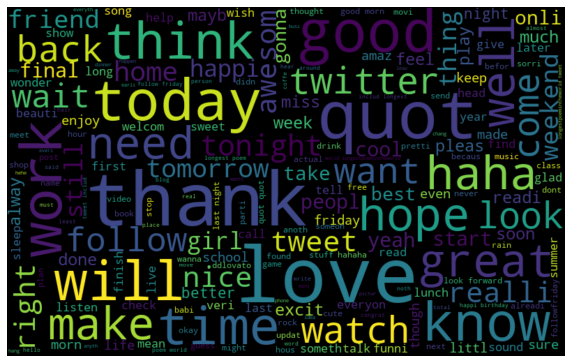

In [ ]:
all_words = ' '.join([text for text in data['Clean_TweetText']])

from wordcloud import WordCloud 
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words) 

plt.figure(figsize=(10, 7)) 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis('off') 
plt.show()

What are the most common words in the dataset for Positive and Depressive tweets, respectively?

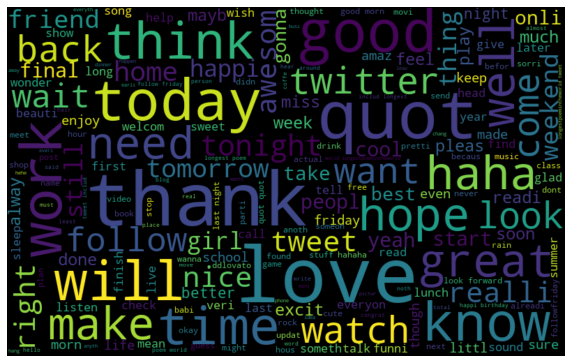

In [ ]:
positive_words =' '.join([text for text in data['Clean_TweetText'][data['target'] == 4]]) 
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(positive_words)

plt.figure(figsize=(10, 7)) 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis('off') 
plt.show()

Model building

In [ ]:
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier 
from sklearn.linear_model import LogisticRegression 
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
count_vectorizer = CountVectorizer(stop_words='english') 
cv = count_vectorizer.fit_transform(data['Clean_TweetText'])
cv.shape

(25000, 28258)

In [ ]:
data['Clean_TweetText']

0                                                  rimythiagirl want slide show
1                                shower then mall chiclett sean last prom stuff
2                                                                   scath thank
3                                                            jennaschubart demi
4                      alisondoyl know love creativ know employ might look them
                                          ...                                  
24995    quot beauti made quot demi lovato ddlovato woah check your trend topic
24996                                               friend hurri ball iwni iwni
24997                                                   hehe love knox romanian
24998                      jenscloset ummm have anoth senior moment here natali
24999                                                            thrill weekend
Name: Clean_TweetText, Length: 25000, dtype: object

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(cv,data['target'] , test_size=.2,stratify=data['target'], random_state=42)

In [ ]:
Xs_train = pd.DataFrame(data= X_train)
Xs_train

,0
0,"(0, 27907)\t1\n (0, 15345)\t1\n (0, 16410)\t1\n (0, 3443)\t1\n (0, 10151)\t1\n (0, 3731)\t1"
1,"(0, 20578)\t1\n (0, 7927)\t1\n (0, 3443)\t2\n (0, 26580)\t1"
2,"(0, 14965)\t2\n (0, 7611)\t1\n (0, 18286)\t1\n (0, 9117)\t1\n (0, 21232)\t1"
3,"(0, 26903)\t1\n (0, 20127)\t2\n (0, 3070)\t1\n (0, 27914)\t1\n (0, 20638)\t1\n (0, 13527)\t1\n (0, 4005)\t1\n (0, 15910)\t1"
4,"(0, 19849)\t1\n (0, 25080)\t1\n (0, 7870)\t1\n (0, 141)\t1"
...,...
19995,"(0, 8615)\t1\n (0, 14785)\t1"
19996,"(0, 7476)\t1\n (0, 21938)\t1\n (0, 19803)\t1\n (0, 227)\t1\n (0, 16584)\t1\n (0, 21324)\t1"
19997,"(0, 24740)\t1\n (0, 17333)\t1"
19998,"(0, 14658)\t1\n (0, 16863)\t1\n (0, 27944)\t1\n (0, 406)\t1\n (0, 16058)\t1\n (0, 11354)\t1"


In [ ]:
xgbc = XGBClassifier(max_depth=6, n_estimators=1000, nthread= 3)
xgbc.fit(X_train,y_train)
prediction_xgb = xgbc.predict(X_test)
print(accuracy_score(prediction_xgb,y_test))

1.0


In [ ]:
rf = RandomForestClassifier(n_estimators=1000, random_state=42)
rf.fit(X_train,y_train)
prediction_rf = rf.predict(X_test)
print(accuracy_score(prediction_rf,y_test))

1.0


In [ ]:
lr = LogisticRegression()
lr.fit(X_train,y_train)
prediction_lr = lr.predict(X_test)
print(accuracy_score(prediction_lr,y_test))

ValueError: ignored

In [ ]:
svc = svm.SVC()
svc.fit(X_train,y_train)
prediction_svc = svc.predict(X_test)
print(accuracy_score(prediction_svc,y_test))

ValueError: ignored

KNN algorithm


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
from sklearn.preprocessing import StandardScaler    
st_x= StandardScaler()    
classifier= KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2 )  
classifier.fit(X_train, y_train)
y_pred= classifier.predict(X_test)    
print(accuracy_score(y_pred,y_test))

1.0


K-means algorithm


In [ ]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_pred,y_test)

In [ ]:
print("accuracy : ",accuracy)